## A life-cycle consumption model with a discrete choice

- author: Tao Wang
- date: Mar 2024

In [69]:
import numpy as np
from interpolation import mlinterp
from numba import float64, int64, boolean
from numba.experimental import jitclass
import matplotlib.pyplot as plt
from time import time
from copy import copy 


In [70]:
from resources_jit import MeanOneLogNormal as lognorm
from SolveLifeCycle import EGM_br
from SolveLifeCycleDC import LifeCycleDC, EGM_DC, solve_model_backward_iter_DC, solve_model_iter_DC

In [71]:
## plot configuration 

plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'

## Set the 
plt.rc('font', size=25)
# Set the axes title font size
plt.rc('axes', titlesize=20)
# Set the axes labels font size
plt.rc('axes', labelsize=20)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=20)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=20)
# Set the legend font size
plt.rc('legend', fontsize=20)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

## Still Under Development!!!

In [72]:
pref_shock = 0.0001

## Initialize the model

In [73]:
if __name__ == "__main__":

    ## parameters 
    ###################

    U = 0.2 ## transitory ue risk

    ## life cycle 

    T = 10
    L = 20
    G = np.ones(L)
    YPath = np.cumprod(G)

## Life-Cycle Problem 

In [74]:
## set the grid size 

grid_size = 80
grid_max = 3.0

In [75]:
if __name__ == "__main__":
    lc_paras = {'sigma_psi':0.15, # permanent 
                'sigma_eps': 0.1, #transitory
                'U':U,
                'ρ':2,
                'R':1.01,
                'T':T,
                'L':L,
                'G':G,
                'β':0.97,
                'x':0.0,  # no MA shock 
                'borrowing_cstr':True,
                'borrowing_cstr_value':-0.5,
                'b_y':0.0, #no persistent state
                'unemp_insurance':0.5,
                'value_func': True,
                'grid_size': grid_size,
                'grid_max': grid_max,
                'grid_min': -0.30,
                'grid_max':grid_max,
                'pref_shock':pref_shock
               }

In [76]:
if __name__ == "__main__":
    lc_dc = LifeCycleDC(**lc_paras)

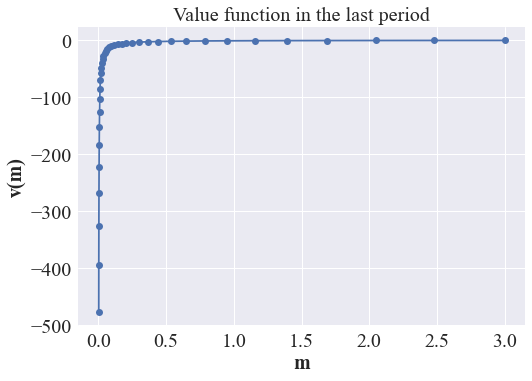

In [77]:
# Initial the end-of-period consumption policy of σ = consume all assets

if __name__ == "__main__":

    ## initial consumption functions 
    
    m_init,σ_1_init,σ_2_init,d_init,v_1_init,v_2_init,v_init = lc_dc.terminal_solution()
    plt.title('Value function in the last period')
    plt.plot(m_init[int(m_init.shape[0]/2):-1,1,1],
             v_1_init[int(m_init.shape[0]/2):-1,1,1],
            'o-')
    plt.xlabel('m')
    plt.ylabel('v(m)')

In [78]:
if __name__ == "__main__":

    t_start = time()

    ### this line is very important!!!!
    #### need to regenerate shock draws for new sigmas
    lc_dc.prepare_shocks()

    ## terminal solution
    m_init,σ_1_init,σ_2_init,d_init,v_1_init,v_2_init, v_init= lc_dc.terminal_solution()
    
    m_out,σ_1_out,σ_2_out,d_out,v_1_out,v_2_out,v_out = EGM_DC(m_init,
                                                               σ_1_init,
                                                               σ_2_init,
                                                               d_init,
                                                               v_1_init,
                                                               v_2_init,
                                                               v_init,
                                                               lc_dc.L-3, 
                                                               lc_dc)
        
    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

Time taken, in seconds: 2.8475730419158936


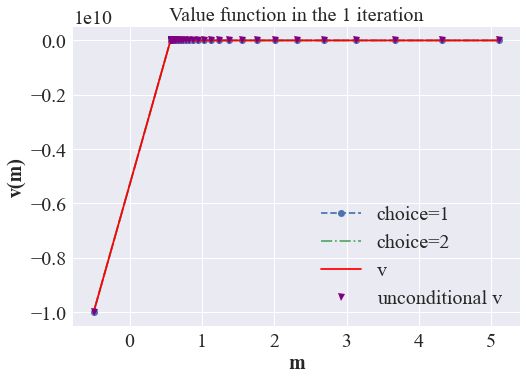

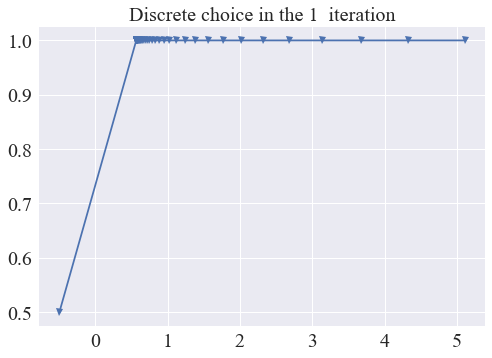

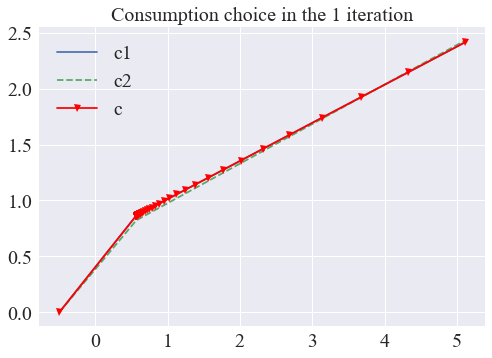

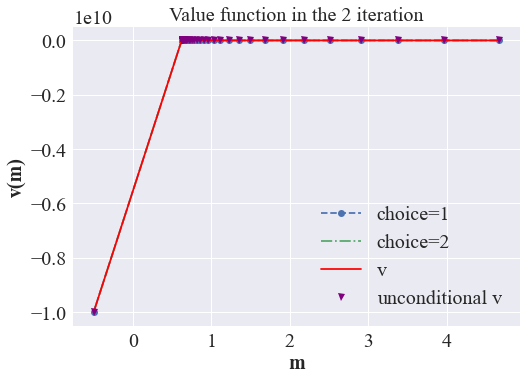

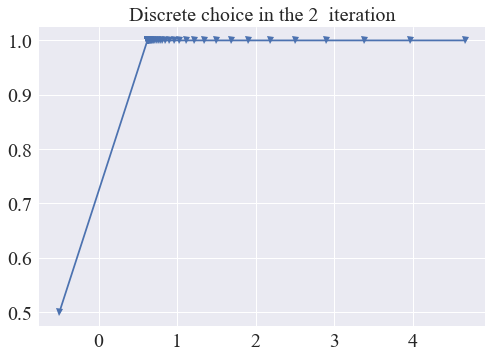

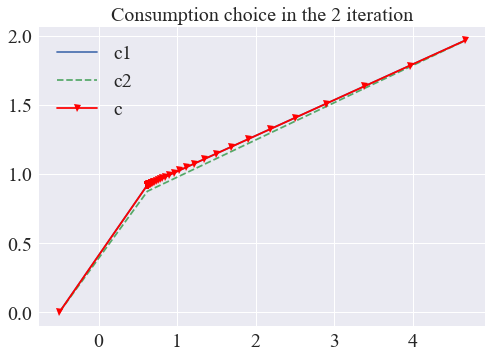

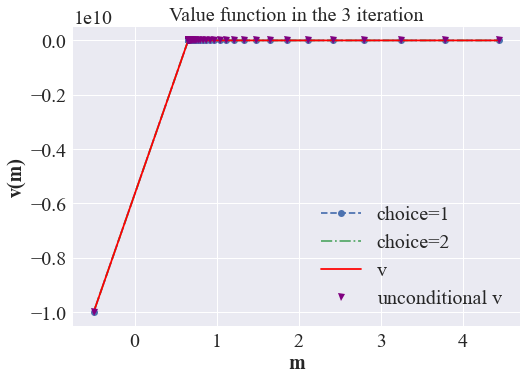

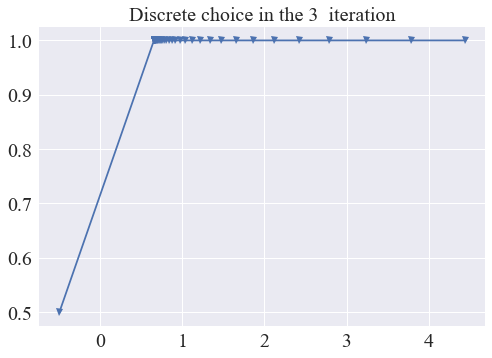

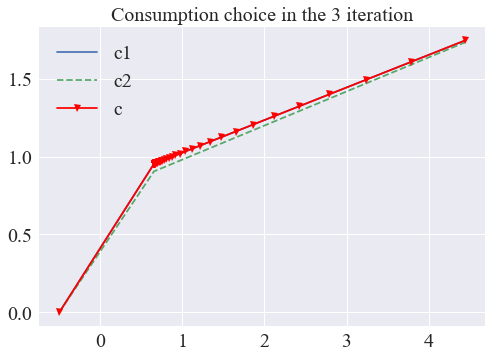

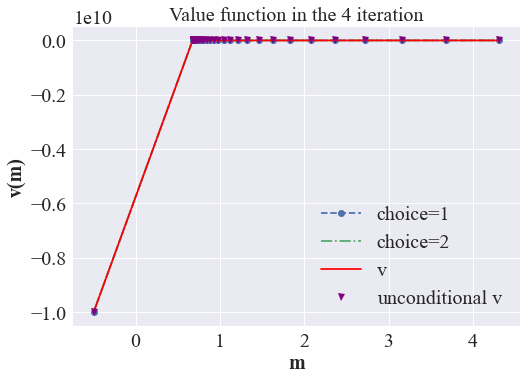

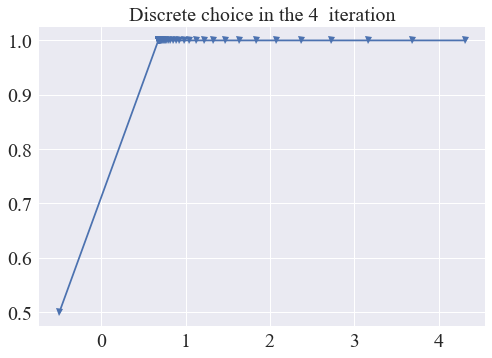

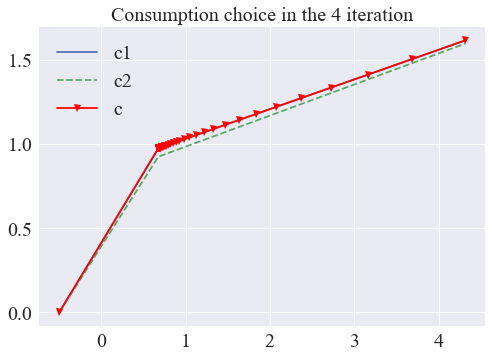

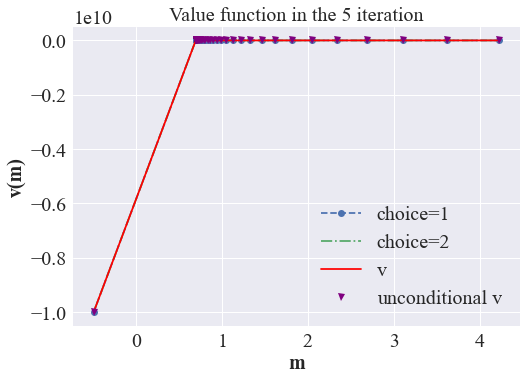

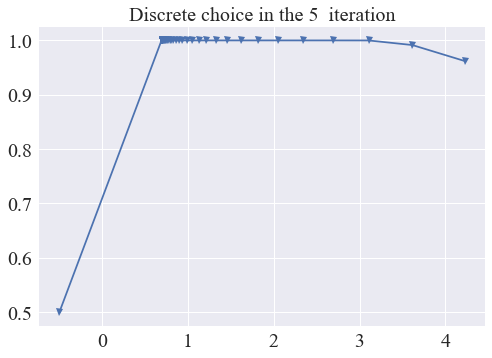

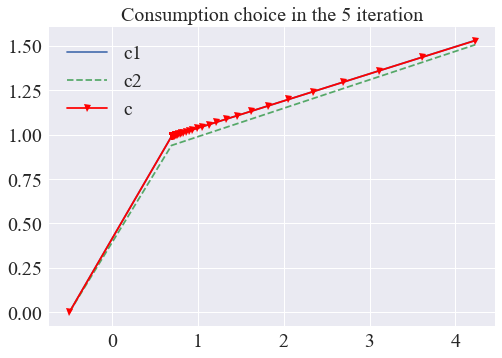

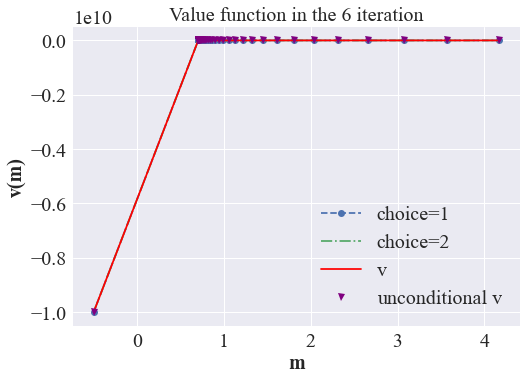

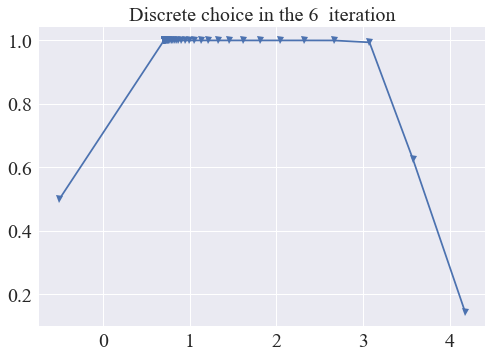

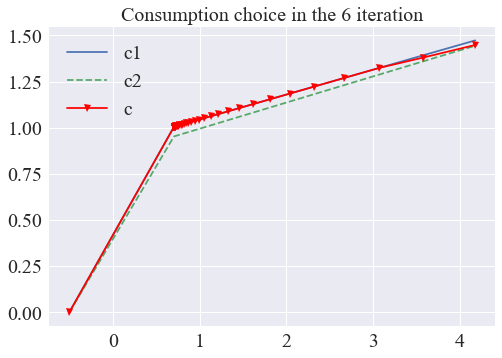

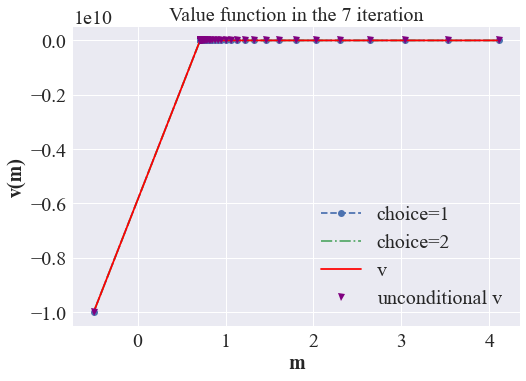

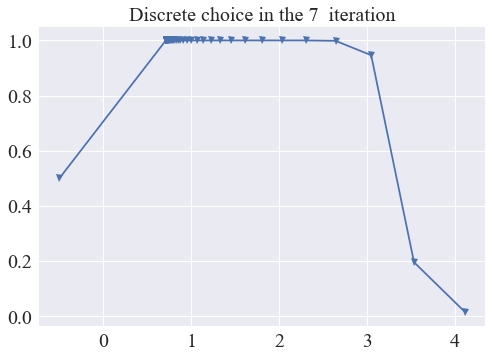

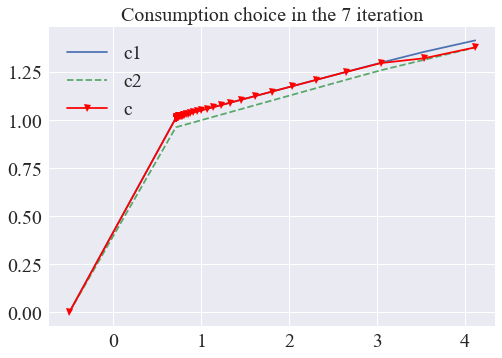

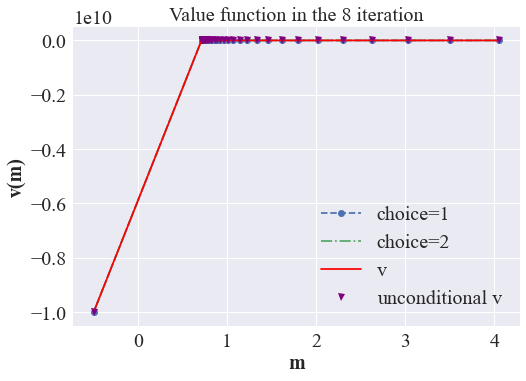

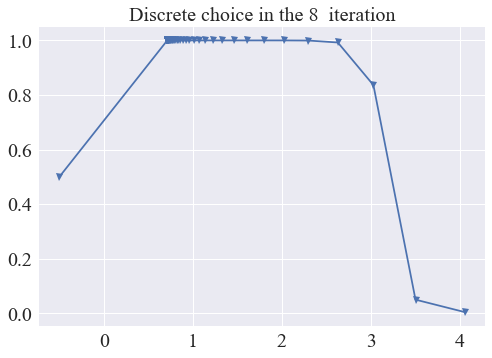

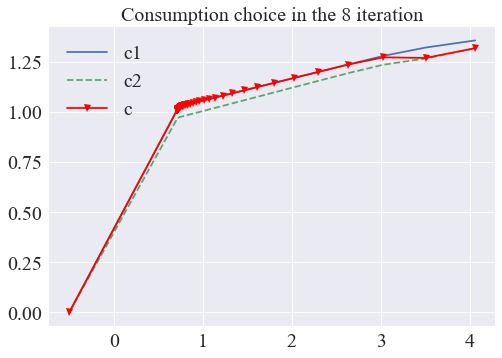

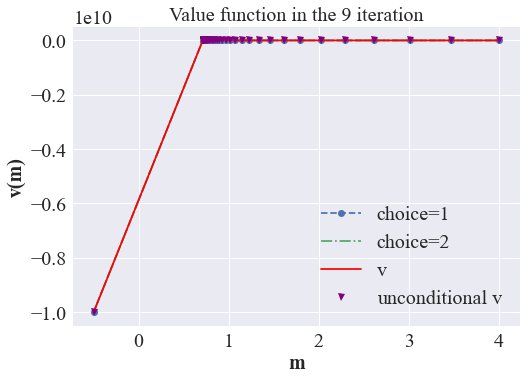

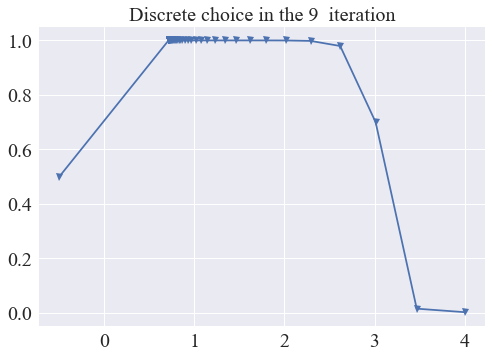

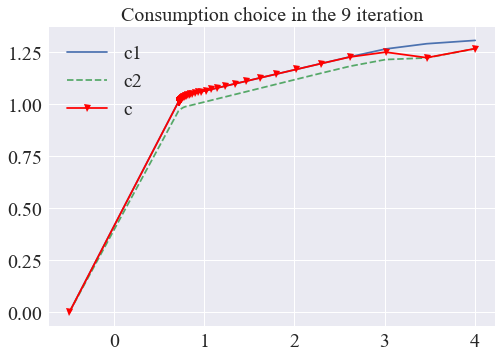

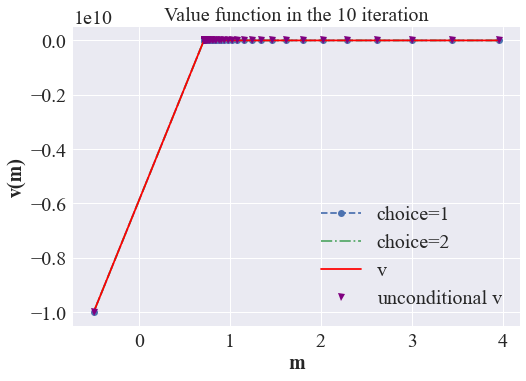

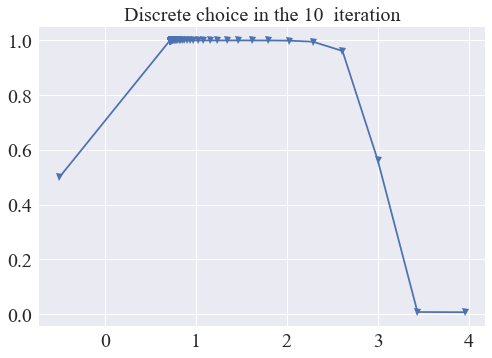

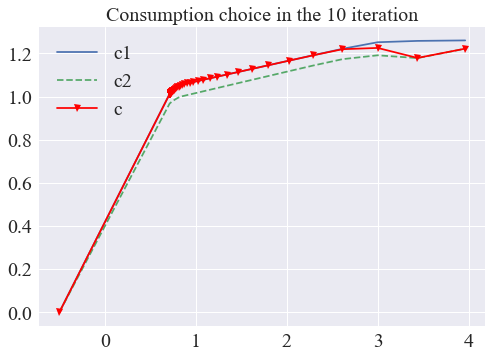

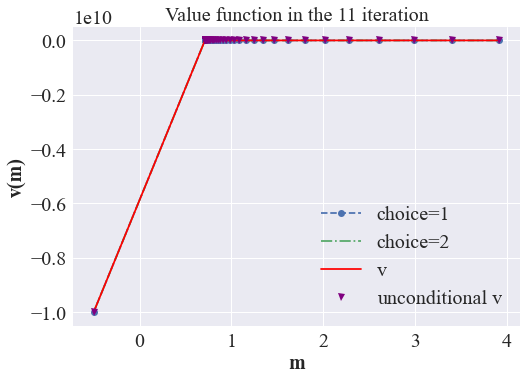

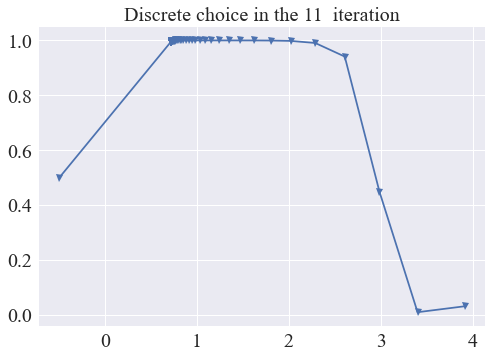

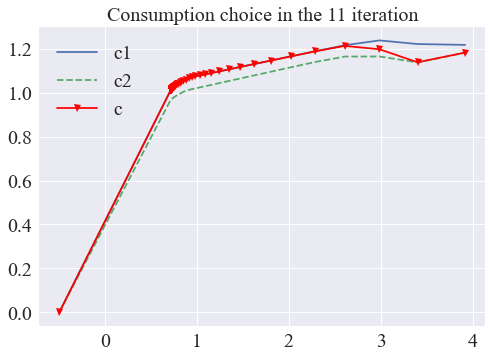

Time taken, in seconds: 18.927348136901855


In [79]:
if __name__ == "__main__":

    t_start = time()
    
    #start_m_at = int(m_init.shape[0]/12)
    start_m_at  = 0 
    iter = 0

    ## terminal solution
    while iter <=10:
        m_out,σ_1_out,σ_2_out,d_out,v_1_out,v_2_out,v_out = EGM_DC(m_out,
                                                                   σ_1_out,
                                                                   σ_2_out,
                                                                   d_out,
                                                                   v_1_out,
                                                                   v_2_out,
                                                                   v_out,
                                                                   lc_dc.L-6, 
                                                                   lc_dc)
        iter+=1
        
        ## Plot the value funciton after the first iterations 
        
        plt.title('Value function in the {} iteration'.format(iter))
        plt.plot(m_out[start_m_at:-1,1,1],
                v_1_out[start_m_at:-1,1,1],
                'o--',
                label='choice=1')
        
        plt.plot(m_out[start_m_at:-1,1,1],
                v_2_out[start_m_at:-1,1,1],
                '-.',
                label='choice=2')
        plt.plot(m_out[start_m_at:-1,1,1],
                        d_out[start_m_at:-1,1,1]*v_1_out[start_m_at:-1,1,1]+(1- d_out[start_m_at:-1,1,1])*v_2_out[start_m_at:-1,1,1],
                        'r-',
                        label='v')
        plt.plot(m_out[start_m_at:-1,1,1],
                        v_out[start_m_at:-1,1,1],
                        'v',
                        color='purple',
                        label='unconditional v')
        
        plt.xlabel('m')
        plt.ylabel('v(m)')
        plt.legend()
        plt.show()

        plt.plot(m_out[start_m_at:-1,1,1],
                d_out[start_m_at:-1,1,1],
                '-v')
        plt.title('Discrete choice in the {}  iteration'.format(iter))
        plt.show()

        plt.plot(m_out[start_m_at:-1,1,1],
                σ_1_out[start_m_at:-1,1,1],
                '-',label='c1')
        plt.plot(m_out[start_m_at:-1,1,1],
                σ_2_out[start_m_at:-1,1,1],
                '--',label='c2')
        plt.plot(m_out[start_m_at:-1,1,1],
                d_out[start_m_at:-1,1,1]*σ_1_out[start_m_at:-1,1,1]+(1- d_out[start_m_at:-1,1,1])*σ_2_out[start_m_at:-1,1,1],
                'r-v',label='c')
        
        plt.legend()
        plt.title('Consumption choice in the {} iteration'.format(iter))
        plt.show()

t_finish = time()
print("Time taken, in seconds: "+ str(t_finish - t_start))


In [80]:
if __name__ == "__main__":

    t_start = time()

    ### this line is very important!!!!
    #### need to regenerate shock draws for new sigmas
    lc_dc.prepare_shocks()

    ## terminal solution
    m_init,σ_1_init,σ_2_init,d_init,v_1_init,v_2_init, v_init= lc_dc.terminal_solution()
            
    ## solve backward
    ms_star, σs_1_star,σs_2_star, ds_star, vs_1_star,vs_2_star,vs_star = solve_model_backward_iter_DC(lc_dc,
                                                                                                m_init,
                                                                                                σ_1_init,
                                                                                                σ_2_init,
                                                                                                d_init,
                                                                                                v_1_init,
                                                                                                v_2_init,
                                                                                                v_init)                         
    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))

at work age of 19
at work age of 18
at work age of 17
at work age of 16
at work age of 15
at work age of 14
at work age of 13
at work age of 12
at work age of 11
at work age of 10
at work age of 9
at work age of 8
at work age of 7
at work age of 6
at work age of 5
at work age of 4
at work age of 3
at work age of 2
at work age of 1
Time taken, in seconds: 49.38123083114624


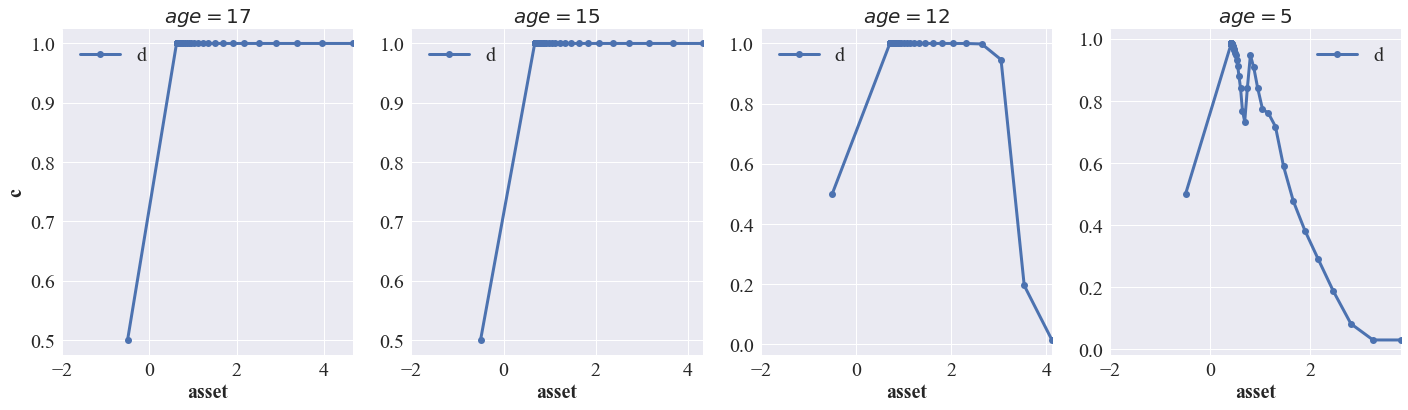

In [81]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    years_left = [3,5,8,15]
    
    #start_m_at = int(m_init.shape[0]/31)
    start_m_at = 0
    n_sub = len(years_left)

    eps_fix = 0 ## the first eps grid 

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_dc.L-year
        i = lc_dc.L-age
        m_plt,d_plt = ms_star[i,start_m_at:-1,eps_fix,0],ds_star[i,start_m_at:-1,eps_fix,0]
        axes[x].plot(m_plt,
                        d_plt,
                        'o-',
                        lw=3,
                        label='d'
                    )

        axes[x].legend()
        axes[x].set_xlim(-2.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

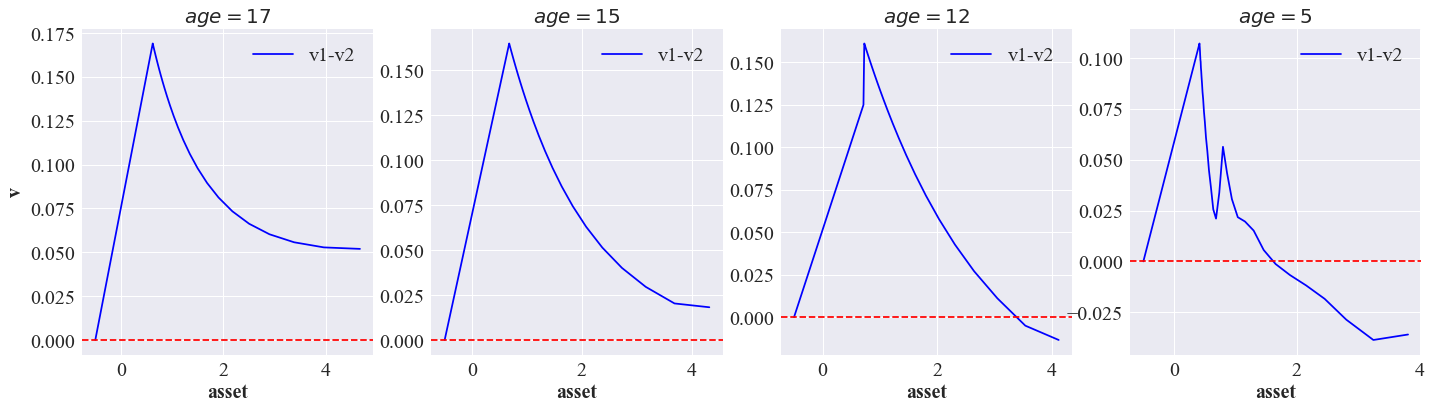

In [82]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    
    n_sub = len(years_left)
    start_m_at = 0
    
    eps_fix = 0 ## the first eps grid 

    fig,axes = plt.subplots(1,n_sub,
                            figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_dc.L-year
        i = lc_dc.L-age
        m_plt,v1_plt,v2_plt = ms_star[i,start_m_at:-1,eps_fix,1],vs_1_star[i,start_m_at:-1,eps_fix,1],vs_2_star[i,start_m_at:-1,eps_fix,1]
        axes[x].plot(m_plt,
                    v1_plt-v2_plt,
                    'b-',
                    label='v1-v2'
                    )
        axes[x].axhline(y=0.0, 
                        color='r', 
                        linestyle='--')
        axes[x].legend()
        #axes[x].set_xlim(0.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('v')
        axes[x].set_title(r'$age={}$'.format(age))

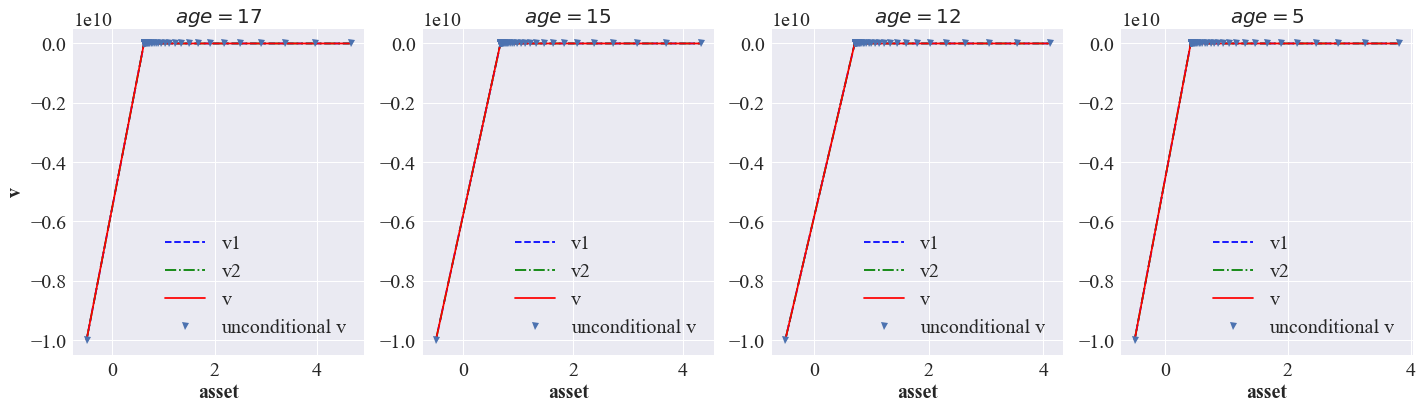

In [83]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    
    n_sub = len(years_left)

    eps_fix = 0 ## the first eps grid 

    fig,axes = plt.subplots(1,n_sub,
                            figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_dc.L-year
        i = lc_dc.L-age
        m_plt,v1_plt,v2_plt,d_plot,v_plot = ms_star[i,start_m_at:-1,eps_fix,1],vs_1_star[i,start_m_at:-1,eps_fix,1],vs_2_star[i,start_m_at:-1,eps_fix,1],ds_star[i,start_m_at:-1,eps_fix,1],vs_star[i,start_m_at:-1,eps_fix,1]
        axes[x].plot(m_plt,
                    v1_plt,
                    'b--',
                    label='v1'
                    )
        axes[x].plot(m_plt,
                    v2_plt,
                     'g-.',
                    label='v2')
        axes[x].plot(m_plt,
                     d_plot*v1_plt+(1-d_plot)*v2_plt,
                    'r-',
                    label='v')
        axes[x].plot(m_plt,
                     v_plot,
                    'v',
                    label='unconditional v')
        axes[x].legend()
        #axes[x].set_xlim(0.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('v')
        axes[x].set_title(r'$age={}$'.format(age))

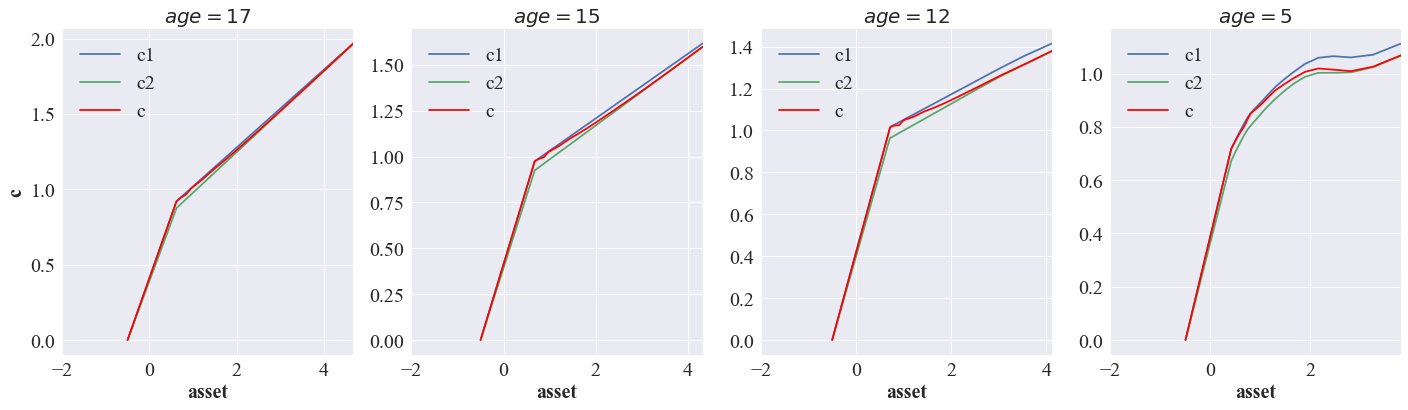

In [84]:
if __name__ == "__main__":

    ## plot c func at different age /asset grid
    
    n_sub = len(years_left)

    eps_fix = 0 ## the first eps grid 

    fig,axes = plt.subplots(1,n_sub,figsize=(6*n_sub,6))

    for x,year in enumerate(years_left):
        age = lc_dc.L-year
        i = lc_dc.L-age
        m_plt,c1_plt,c2_plt, d_plt = ms_star[i,start_m_at:-1,eps_fix,0],σs_1_star[i,start_m_at:-1,eps_fix,0],σs_2_star[i,start_m_at:-1,eps_fix,0],ds_star[i,start_m_at:-1,eps_fix,0]
        axes[x].plot(m_plt,
                        c1_plt,
                        label='c1'
                    )
        axes[x].plot(m_plt,
                        c2_plt,
                    label='c2')
        
        axes[x].plot(m_plt,
                     d_plot*c1_plt+(1-d_plot)*c2_plt,
                    'r-',
                    label='c')
        
        axes[x].legend()
        axes[x].set_xlim(-2.0,np.max(m_plt))
        axes[x].set_xlabel('asset')
        axes[0].set_ylabel('c')
        axes[x].set_title(r'$age={}$'.format(age))

## Infinite horizon problem

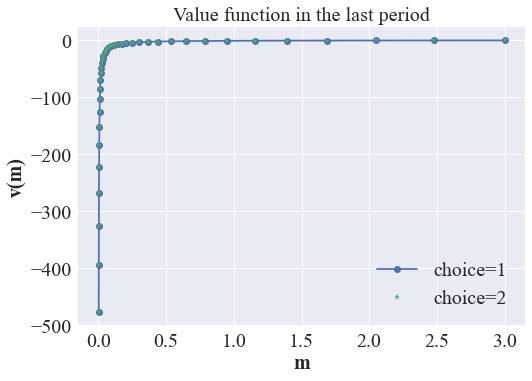

In [85]:
if __name__ == "__main__":
    
    inf_liv_paras = copy(lc_paras)
    
    ## initialize a model instance

    inf_liv = LifeCycleDC(**inf_liv_paras)

    ## initial guess of consumption functions 

    m_init,σ_1_init,σ_2_init,d_init,v_1_init,v_2_init, v_init = inf_liv.terminal_solution()
   
    plt.title('Value function in the last period')
    plt.plot(m_init[int(m_init.shape[0]/2):-1,1,1],
             v_1_init[int(m_init.shape[0]/2):-1,1,1],
            'o-',label='choice=1')
    
    plt.plot(m_init[int(m_init.shape[0]/2):-1,1,1],
             v_2_init[int(m_init.shape[0]/2):-1,1,1],
            '*',label='choice=2')
    
    plt.xlabel('m')
    plt.ylabel('v(m)')
    plt.legend()


Converged in 2 iterations.
Time taken, in seconds: 7.231842994689941


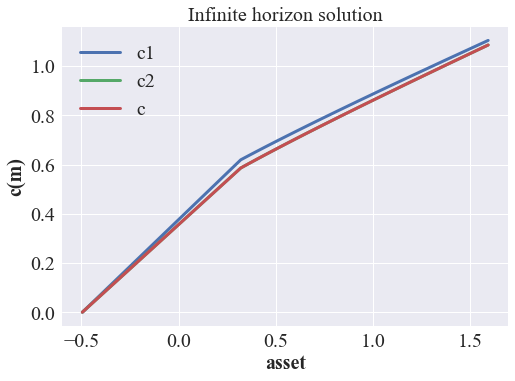

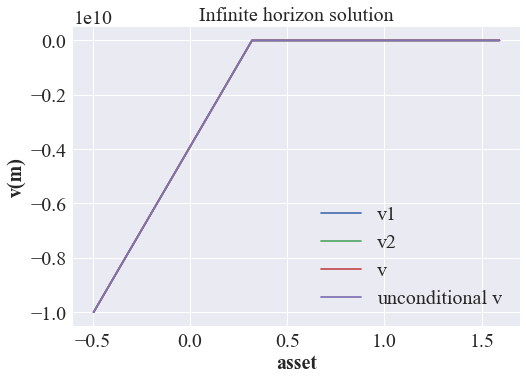

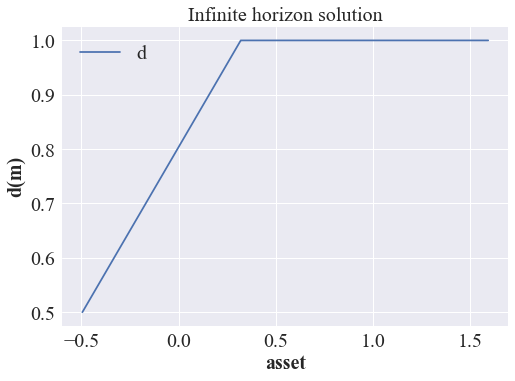

In [86]:
if __name__ == "__main__":

    t_start = time()
    #start_m_at = int(m_init.shape[0]/30)
    start_m_at = 0
    end_m_at = int(m_init.shape[0]*0.9)
    ## set different ma parameters 
    m_inf_star, σ_1_inf_star,σ_2_inf_star,d_inf_star,v_1_inf_star,v_2_inf_star, v_inf_star = solve_model_iter_DC(inf_liv,
                                                                                                                m_init,
                                                                                                                σ_1_init,
                                                                                                                σ_2_init,
                                                                                                                d_init,
                                                                                                                v_1_init,
                                                                                                                v_2_init,
                                                                                                                v_init)

    t_finish = time()

    print("Time taken, in seconds: "+ str(t_finish - t_start))   

    ## plot c func 
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             σ_1_inf_star[start_m_at:end_m_at,0,0],
             lw=3,
             label='c1'
            )
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             σ_2_inf_star[start_m_at:end_m_at,0,0],
             lw=3,
             label='c2'
            )
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             d_inf_star[start_m_at:end_m_at,0,0]*σ_2_inf_star[start_m_at:end_m_at,0,0]+(1-d_inf_star[start_m_at:end_m_at,0,0])*σ_2_inf_star[start_m_at:end_m_at,0,0],
             lw=3,
             label='c'
            )
    plt.legend()
    plt.xlabel('asset')
    plt.ylabel('c(m)')
    plt.title('Infinite horizon solution')
    plt.show()

    ## plot v func 

    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             v_1_inf_star[start_m_at:end_m_at,0,0],
             label='v1'
            )
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             v_2_inf_star[start_m_at:end_m_at,0,0],
             label='v2'
            )
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             d_inf_star[start_m_at:end_m_at,0,0]*v_1_inf_star[start_m_at:end_m_at,0,0]+(1-d_inf_star[start_m_at:end_m_at,0,0])*v_2_inf_star[start_m_at:end_m_at,0,0],
             label='v'
            )
    
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             v_inf_star[start_m_at:end_m_at,0,0],
             label='unconditional v'
            )
    plt.legend()
    plt.xlabel('asset')
    plt.ylabel('v(m)')
    plt.title('Infinite horizon solution')
    plt.show()

    # plot d func
    plt.plot(m_inf_star[start_m_at:end_m_at,0,0],
             d_inf_star[start_m_at:end_m_at,0,0],
             label='d'
            )
 
    plt.legend()
    plt.xlabel('asset')
    plt.ylabel('d(m)')
    plt.title('Infinite horizon solution')
    plt.show()
